# Benchmarking


TODO description

## Import Libraries and Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
from google.colab import drive

PATH = "Uni/Magistrale/Poli/Streaming Data Analytics/project/"

drive.mount('/content/drive')

os.chdir(f'/content/drive/MyDrive/{PATH}')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Uni/Magistrale/Poli/Streaming Data Analytics/project'

In [3]:
df = pd.read_csv('results.csv')

## Data Preparation

In [4]:
# Replace NaN values in dataset column into None (no detector used)
df["detector"] = df["detector"].replace(np.nan, "None")

In [5]:
df[['dataset', 'classifier', 'detector']] = df[['dataset', 'classifier', 'detector']].astype(str)

list_cols = ['windowed_accuracy', 'windowed_f1']

# Transform into list
for col in list_cols: #
    df[col] = df[col].apply(lambda x: list(map(float, str(x).strip('[]').split(','))) if isinstance(x, str) and x != '[]' else (x if isinstance(x, list) else []))

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define families
detector_families = {
    "ADWIN": "window-based",
    "STEPD": "window-based",
    "CUSUM": "change-detection",
    "PageHinkley": "change-detection",
    "DDM": "statistical-process-control",
    "HDDMAverage": "statistical-process-control",
    "HDDMWeighted": "statistical-process-control",
    "None": "basic"
}

# Color mapping
family_colors = {
    "window-based": ["#FF6666", "#CC3333"],   # Shades of red
    "change-detection": ["#6699FF", "#3366CC"],  # Shades of blue
    "statistical-process-control": ["#66CC66", "#339933", "#99FF99"],  # Shades of green
    "basic": ["#999999"]  # Gray
}

# Line styles mapping
family_styles = {
    "window-based": ["-", "--"],  #
    "change-detection": ["-", "--"],
    "statistical-process-control": ["-", "--", "-."],
    "basic": ["-"]
}

def get_plot_style(detector):
    family = detector_families[detector]
    family_detectors = [d for d, f in detector_families.items() if f == family]
    idx = family_detectors.index(detector)
    color = family_colors[family][idx % len(family_colors[family])]
    linestyle = family_styles[family][idx % len(family_styles[family])]
    return color, linestyle



## General Overview

In [7]:
df.head()

,dataset,classifier,detector,cumulative_accuracy,cumulative_f1,windowed_accuracy,windowed_f1,execution_time,cpu_usage,memory_usage,num_changes
0,Electricity,HoeffdingTree,CUSUM,83.913754,83.534769,"[82.33995584988962, 90.06622516556291, 90.7284...","[82.80437598370682, 90.12454845806518, 88.7340...",1.274714,9.088770,632.128906,11
1,Electricity,HoeffdingTree,PageHinkley,82.296081,81.797046,"[82.33995584988962, 90.06622516556291, 93.3774...","[82.80437598370682, 90.12454845806518, 91.9143...",1.233675,8.249432,616.226562,3
2,Electricity,HoeffdingTree,DDM,82.335805,81.880779,"[84.98896247240619, 89.62472406181016, 93.3774...","[85.41178616970414, 89.69540175681291, 92.8205...",1.414099,8.840642,624.824219,70
3,Electricity,HoeffdingTree,HDDMAverage,81.845869,81.302957,"[81.67770419426049, 85.65121412803532, 88.3002...","[81.60549358889153, 85.64375097370635, 85.7536...",2.135786,9.443864,657.257812,438
4,Electricity,HoeffdingTree,HDDMWeighted,82.816914,82.330660,"[84.10596026490066, 86.09271523178808, 89.6247...","[84.52414115747567, 86.21584040516001, 88.2679...",1.800976,9.286591,643.781250,0


In [8]:
df.dtypes

,0
dataset,object
classifier,object
detector,object
cumulative_accuracy,float64
cumulative_f1,float64
windowed_accuracy,object
windowed_f1,object
execution_time,float64
cpu_usage,float64
memory_usage,float64


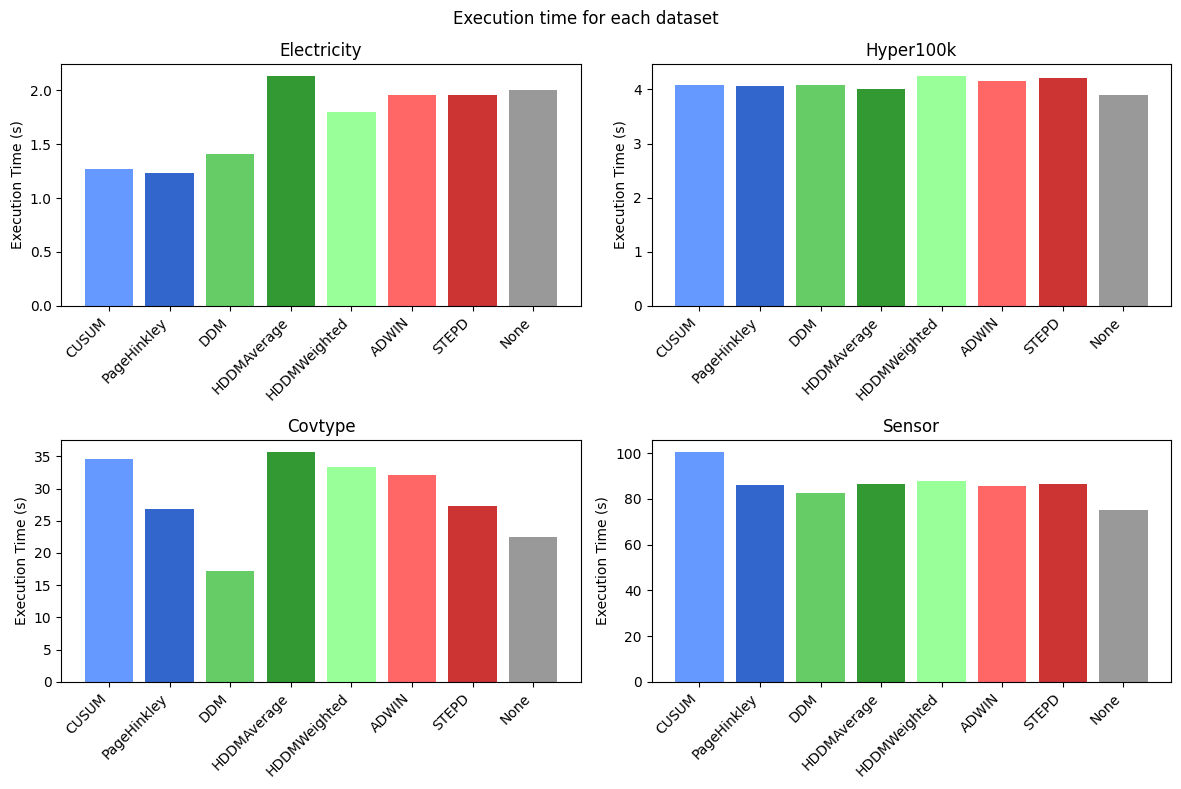

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Execution time for each dataset")

for i, stream in enumerate(df['dataset'].unique()):
  row = i // 2
  col = i % 2

  axs[row, col].set_title(stream)
  axs[row, col].set_ylabel("Execution Time (s)")


  detector_times = {}
  bar_colors = []

  for detector in df['detector'].unique():
      subset = df[(df['dataset'] == stream) & (df['detector'] == detector)]
      if not subset.empty:
          detector_times[detector] = subset['execution_time'].iloc[0]
          color, _ = get_plot_style(detector)
          bar_colors.append(color)

  axs[row, col].bar(detector_times.keys(), detector_times.values(), color=bar_colors)
  axs[row, col].set_xticks(list(detector_times.keys()))
  axs[row, col].set_xticklabels(list(detector_times.keys()), rotation=45, ha='right')


plt.tight_layout()
plt.show()



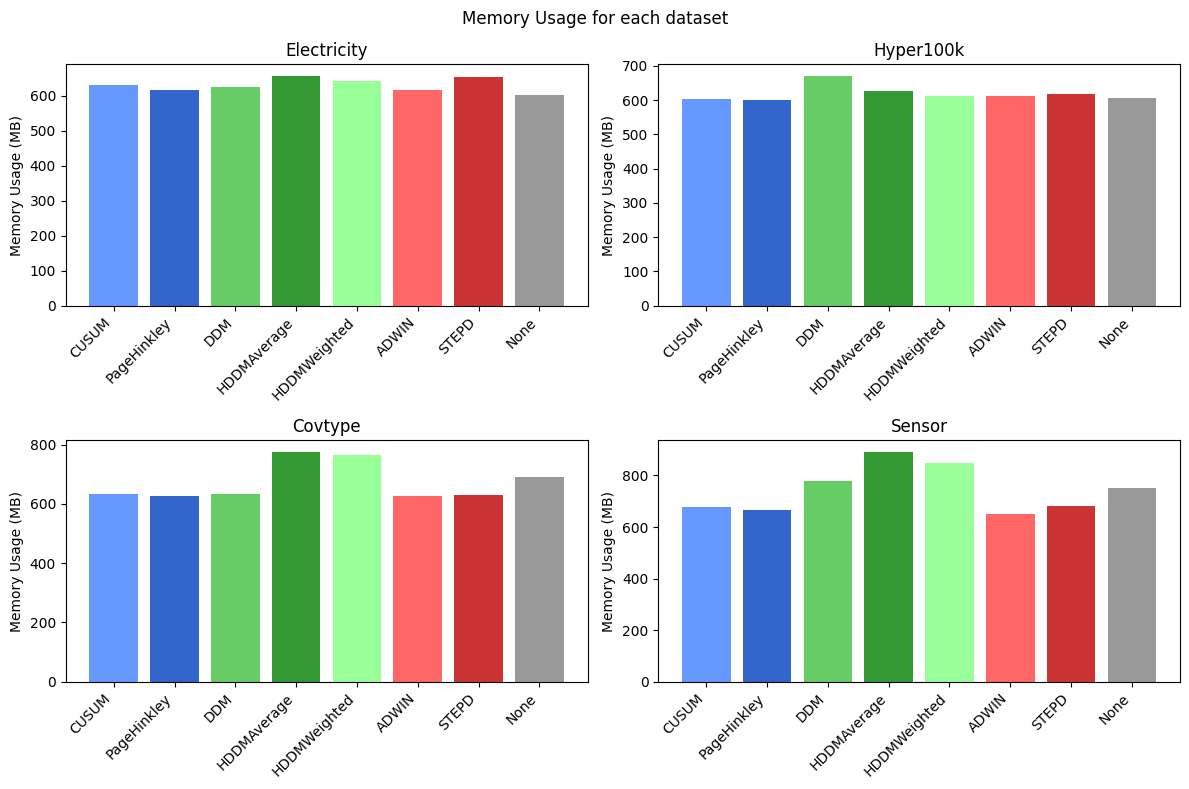

In [10]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Memory Usage for each dataset")

for i, stream in enumerate(df['dataset'].unique()):
  row = i // 2
  col = i % 2

  axs[row, col].set_title(stream)
  axs[row, col].set_ylabel("Memory Usage (MB)")


  detector_times = {}

  bar_colors = []
  for detector in df['detector'].unique():
    subset = df[(df['dataset'] == stream) & (df['detector'] == detector)]
    if not subset.empty:
      detector_times[detector] = subset['memory_usage'].iloc[0]
      color, _ = get_plot_style(detector)
      bar_colors.append(color)

  axs[row, col].bar(detector_times.keys(), detector_times.values(), color=bar_colors)
  axs[row, col].set_xticks(list(detector_times.keys()))
  axs[row, col].set_xticklabels(list(detector_times.keys()), rotation=45, ha='right')



plt.tight_layout()
plt.show()



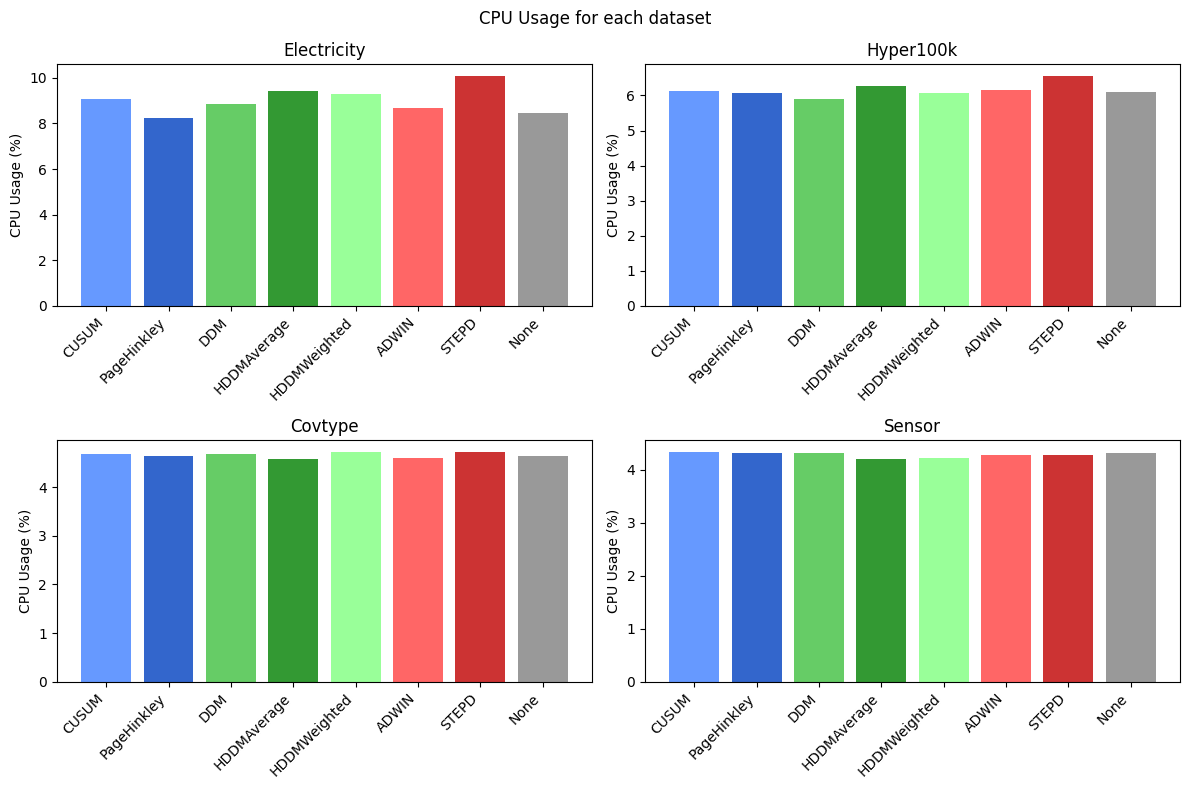

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"CPU Usage for each dataset")

for i, stream in enumerate(df['dataset'].unique()):
  row = i // 2
  col = i % 2

  axs[row, col].set_title(stream)
  axs[row, col].set_ylabel("CPU Usage (%)")


  detector_times = {}

  bar_colors = []
  for detector in df['detector'].unique():
    subset = df[(df['dataset'] == stream) & (df['detector'] == detector)]
    if not subset.empty:
      detector_times[detector] = subset['cpu_usage'].iloc[0]
      color, _ = get_plot_style(detector)
      bar_colors.append(color)

  axs[row, col].bar(detector_times.keys(), detector_times.values(), color=bar_colors)
  axs[row, col].set_xticks(list(detector_times.keys()))
  axs[row, col].set_xticklabels(list(detector_times.keys()), rotation=45, ha='right')



plt.tight_layout()
plt.show()



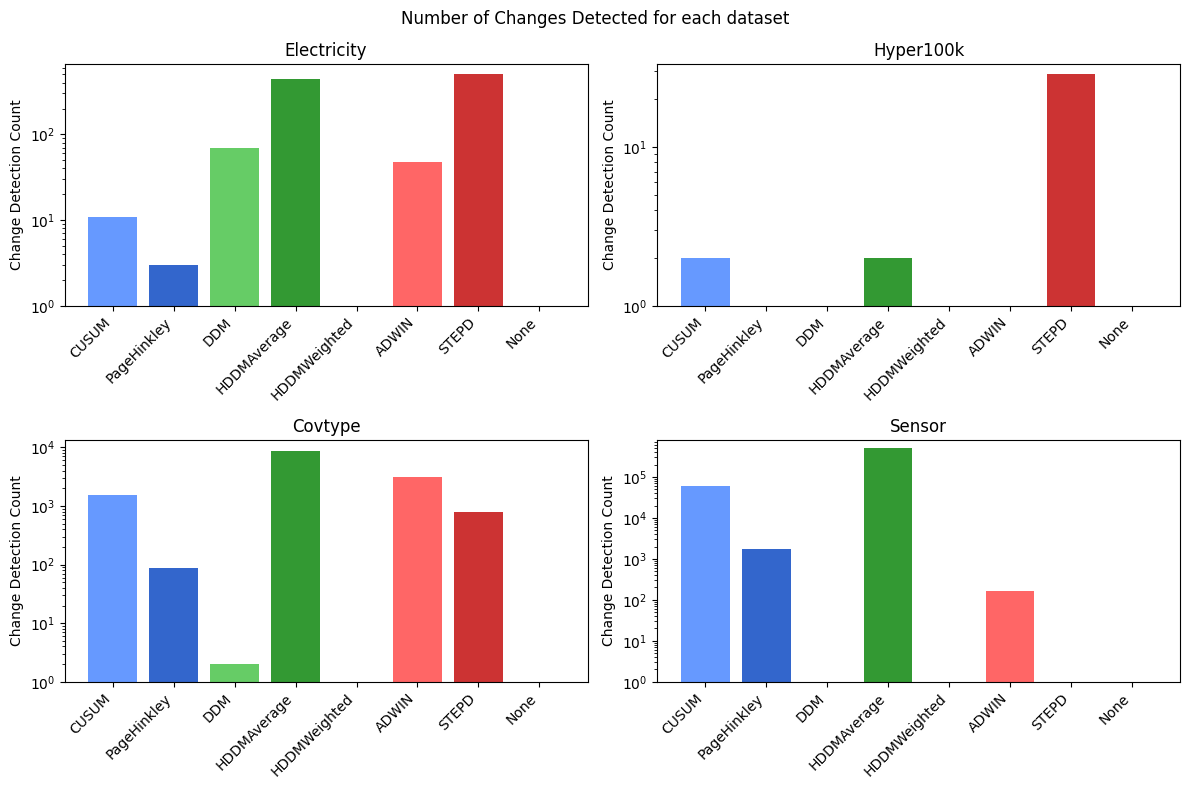

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Number of Changes Detected for each dataset")

for i, stream in enumerate(df['dataset'].unique()):
  row = i // 2
  col = i % 2

  axs[row, col].set_title(stream)
  axs[row, col].set_ylabel("Change Detection Count")


  changes_detected_counts = {}
  bar_colors = []

  for detector in df['detector'].unique():
    subset = df[(df['dataset'] == stream) & (df['detector'] == detector)]
    if not subset.empty:
      changes_detected_counts[detector] = subset['num_changes'].iloc[0]
      color, _ = get_plot_style(detector)
      bar_colors.append(color)

  axs[row, col].bar(changes_detected_counts.keys(), changes_detected_counts.values(), color=bar_colors)
  axs[row, col].set_xticks(list(detector_times.keys()))
  axs[row, col].set_xticklabels(list(detector_times.keys()), rotation=45, ha='right')
  axs[row, col].set_yscale('log')
  axs[row, col].set_ylim(bottom=1)


plt.tight_layout()
plt.show()




## Dataset Result Analysis

In [13]:
def boxplot_detectors(df, metric):

  assert metric in ['accuracy', 'f1'], "Invalid metric. Must be either 'accuracy' or 'f1'."

  fig, ax = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [3, 1]})

  data = [df[df['detector'] == d][f'windowed_{metric}'].iloc[0] for d in df['detector'].unique()]
  colors = [get_plot_style(d)[0] for d in df['detector'].unique()]
  box = ax[0].boxplot(data, patch_artist=True, tick_labels=df['detector'].unique(),
                      medianprops=dict(color='black'))

  for patch, color in zip(box['boxes'], colors):
      patch.set_facecolor(color)

  ax[0].set_title(f"Windowed {metric.title()} per Detector")
  ax[0].set_xlabel("Detector")
  ax[0].set_ylabel(f"{metric.title()}")
  ax[0].grid(True)
  ax[0].set_ylim(bottom=0, top=100)

  ranking = df[['detector', f'cumulative_{metric}']].sort_values(by=f'cumulative_{metric}', ascending=False).reset_index(drop=True)

  ax[1].axis("off")
  ax[1].text(0.0, 0.95, f"Cumulative {metric.title()} (Ranked)", fontsize=18, transform=ax[1].transAxes)

  y = 0.85
  for i, row in ranking.iterrows():
      detector = row['detector']
      acc = row[f'cumulative_{metric}']
      color, _ = get_plot_style(detector)
      ax[1].text(0.0, y, f"{i+1}. {detector}", fontsize=16, color=color, transform=ax[1].transAxes)
      ax[1].text(0.5, y, f"{acc:.2f}", fontsize=16, color=color, transform=ax[1].transAxes)
      y -= 0.07

  plt.tight_layout()
plt.show()

### Electricity Dataset Analysis
*	Number of Instances: 45,312
*	Number of Attributes: 8
*	Number of Classes: 2 (UP, DOWN)


The Electricity dataset is derived from the Australian New South Wales Electricity Market, where electricity prices fluctuate based on supply and demand. Each instance represents a five-minute interval, with class labels indicating whether the electricity price has gone up (UP) or down (DOWN) relative to a moving average over the past 24 hours. This dataset is characterized by temporal dependencies and has been normalized for benchmarking purposes.


Potential Concept Drifts
<table>
  <tr>
    <td style="vertical-align: top; padding-right: 30px;">
      <b></b>
      <ul>
        <li>Gradual</li>
      </ul>
      <img src="https://imgur.com/1GHeKpR.png" width="200">
    </td>
    <td style="vertical-align: top;">
      <ul>
        <li>Recurrent</li>
      </ul>
      <img src="https://imgur.com/hGQLxxx.png" width="200">
    </td>
  </tr>
</table>

* **Gradual Drift**: Gradual changes in electricity demand and market regulations can lead to slow shifts in pricing trends over time. Factors such as long-term economic growth, gradual shifts in energy policies, and incremental adoption of renewable energy sources can cause a progressive drift in the dataset, making it challenging for predictive models to adapt.

*	**Recurring Drift**: Weekly and yearly consumption patterns, such as differences between weekdays and weekends or seasonal variations in electricity demand, can lead to periodic changes in electricity prices. These recurring drifts reflect predictable patterns that repeat over time, impacting the dataset distribution and requiring models to adapt to cyclic behaviors.



In [14]:
electricity_df = df[df['dataset'] == 'Electricity']

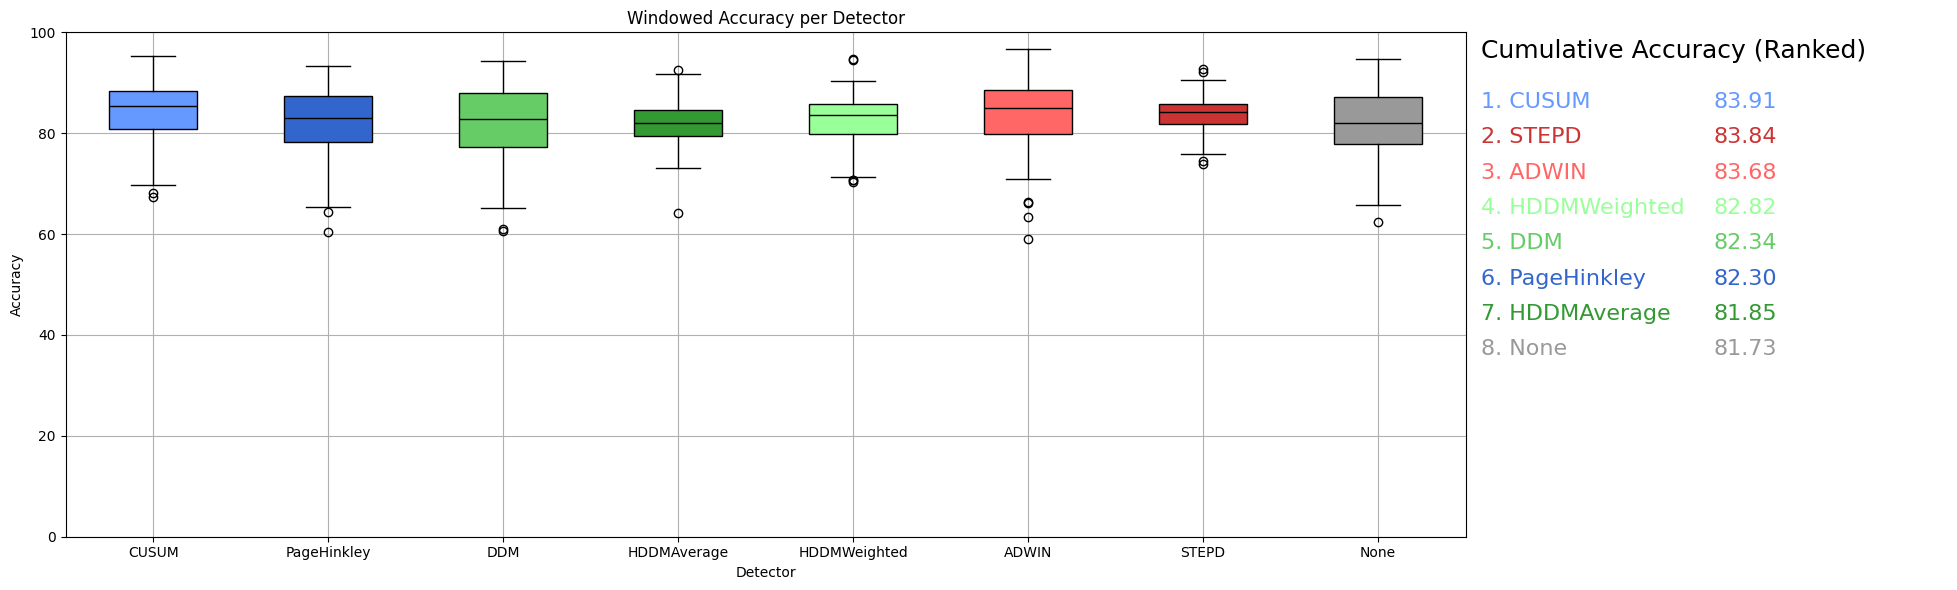

In [15]:
boxplot_detectors(electricity_df, 'accuracy')

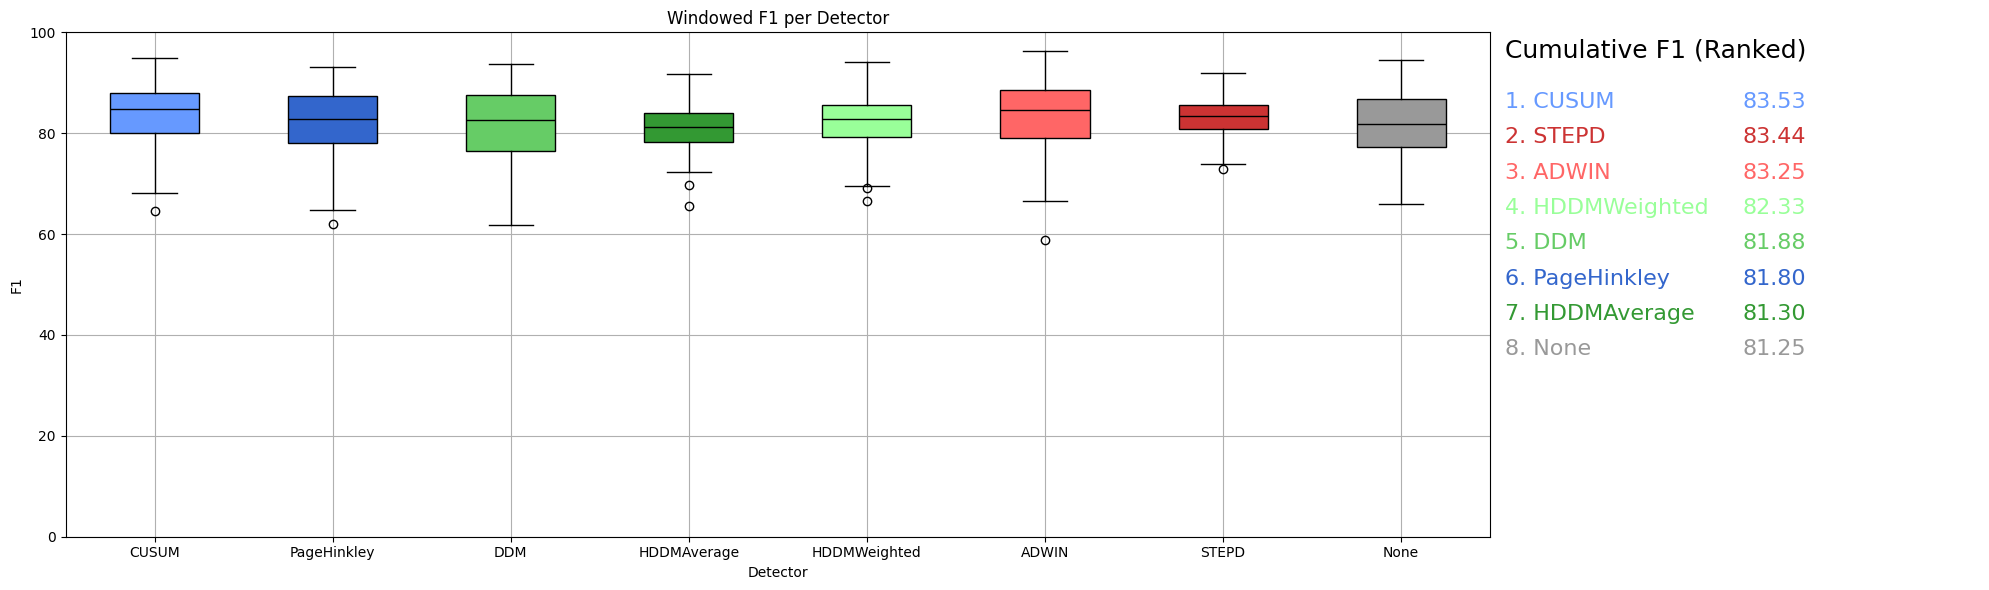

In [16]:
boxplot_detectors(electricity_df, 'f1')

Hyper100k

In [17]:
hyper100k_df = df[df['dataset'] == 'Hyper100k']

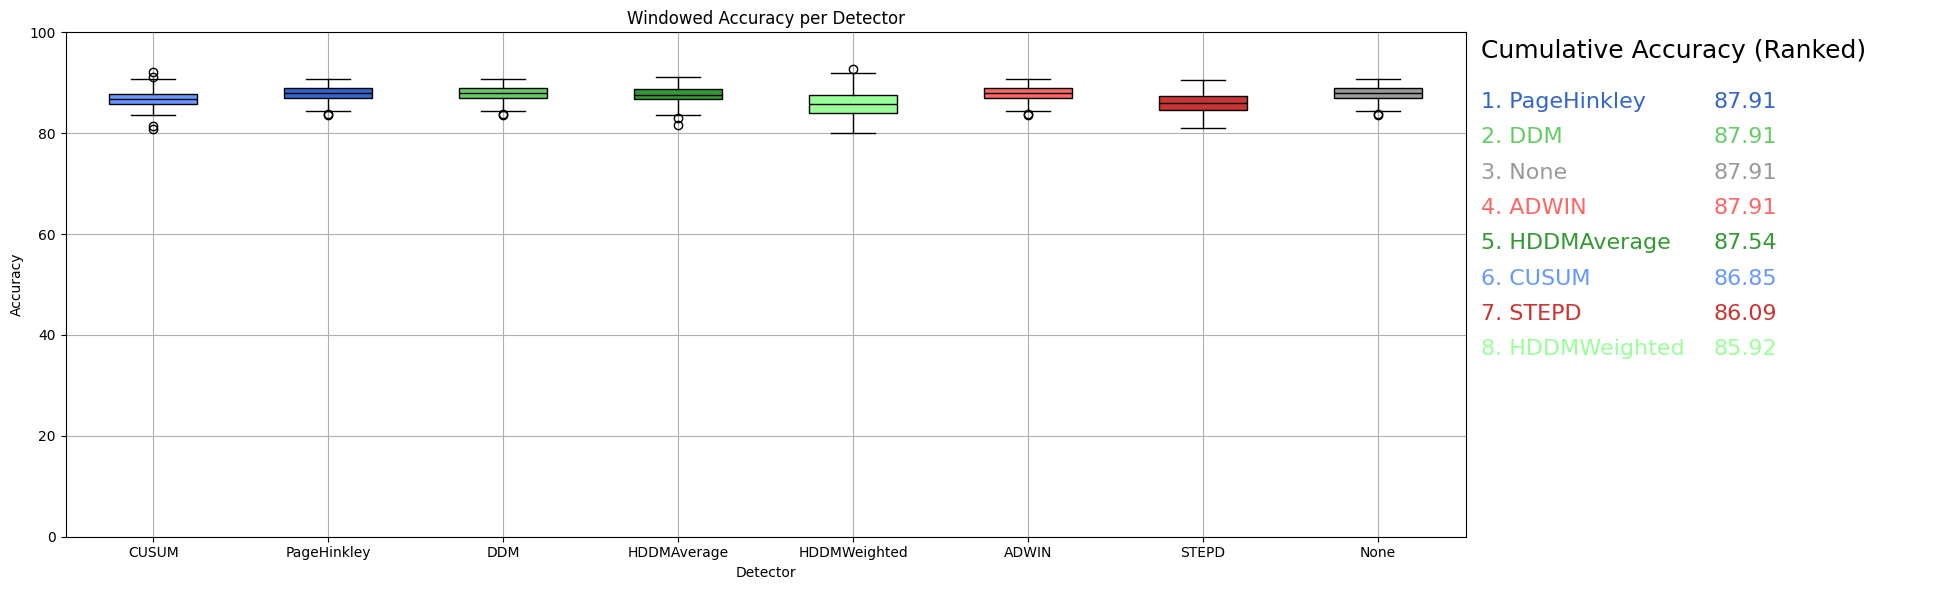

In [18]:
boxplot_detectors(hyper100k_df, 'accuracy')

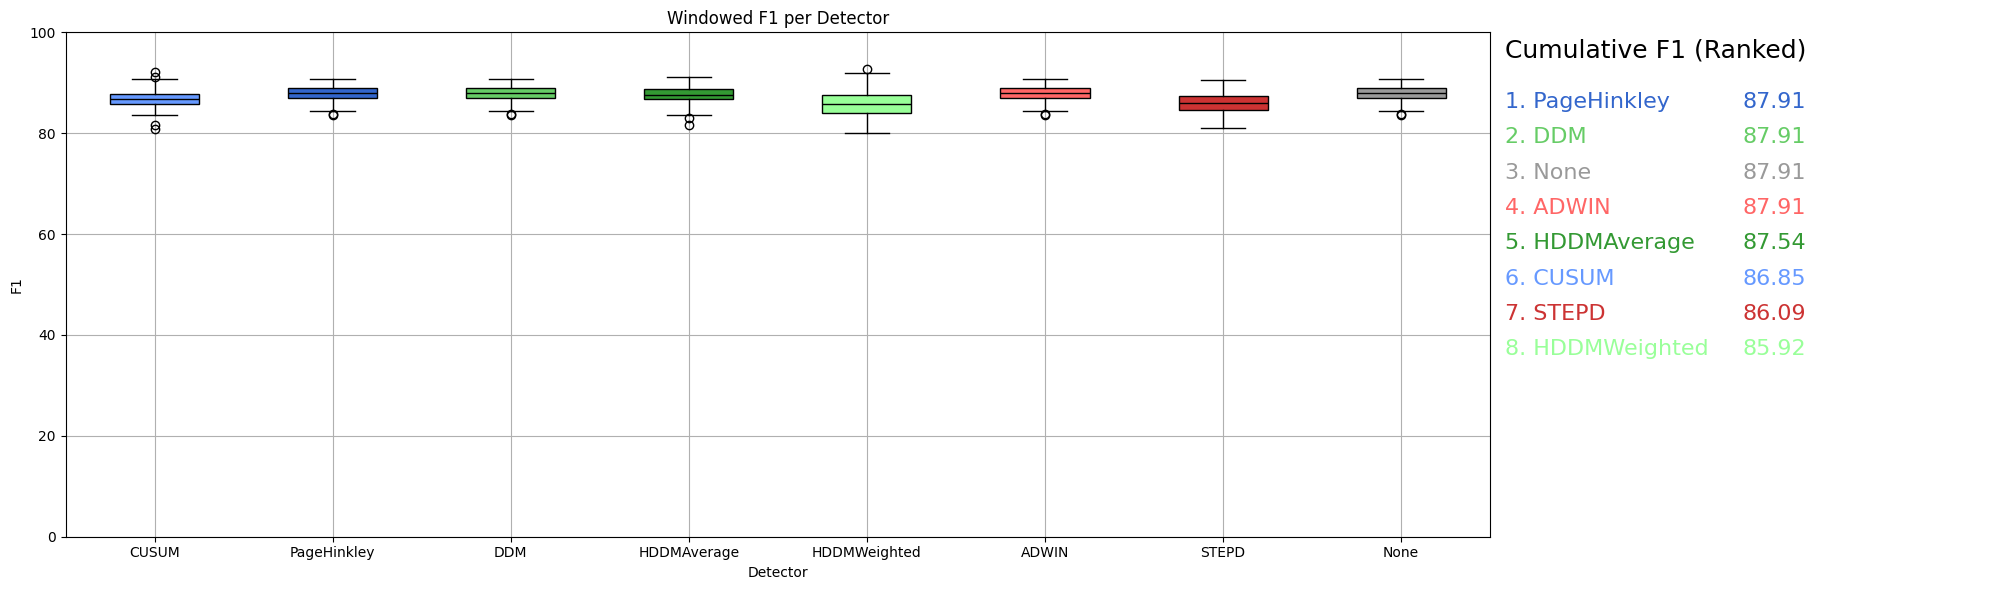

In [19]:
boxplot_detectors(hyper100k_df, 'f1')

Covtype

In [20]:
covtype_df = df[df['dataset'] == 'Covtype']

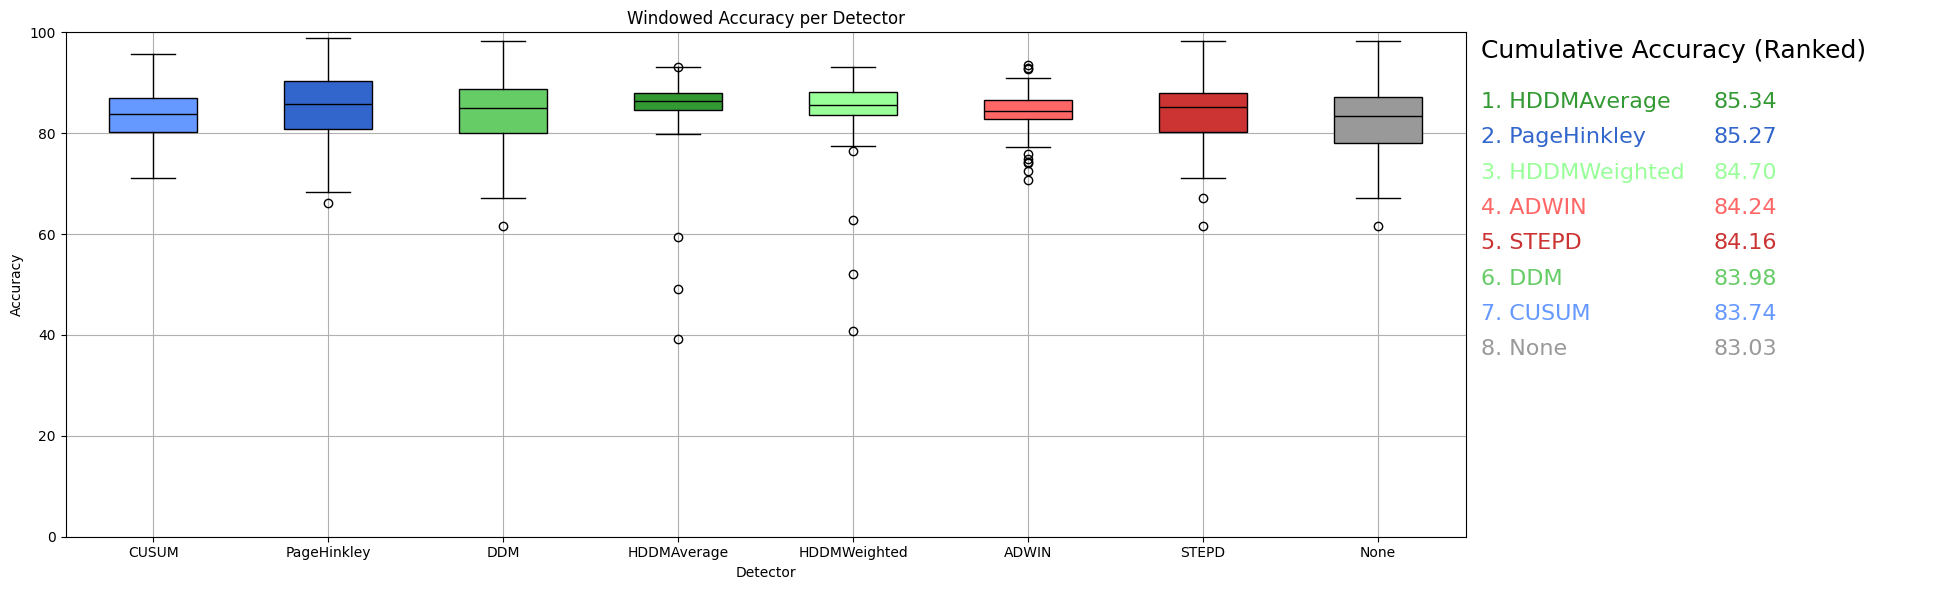

In [21]:
boxplot_detectors(covtype_df, 'accuracy')

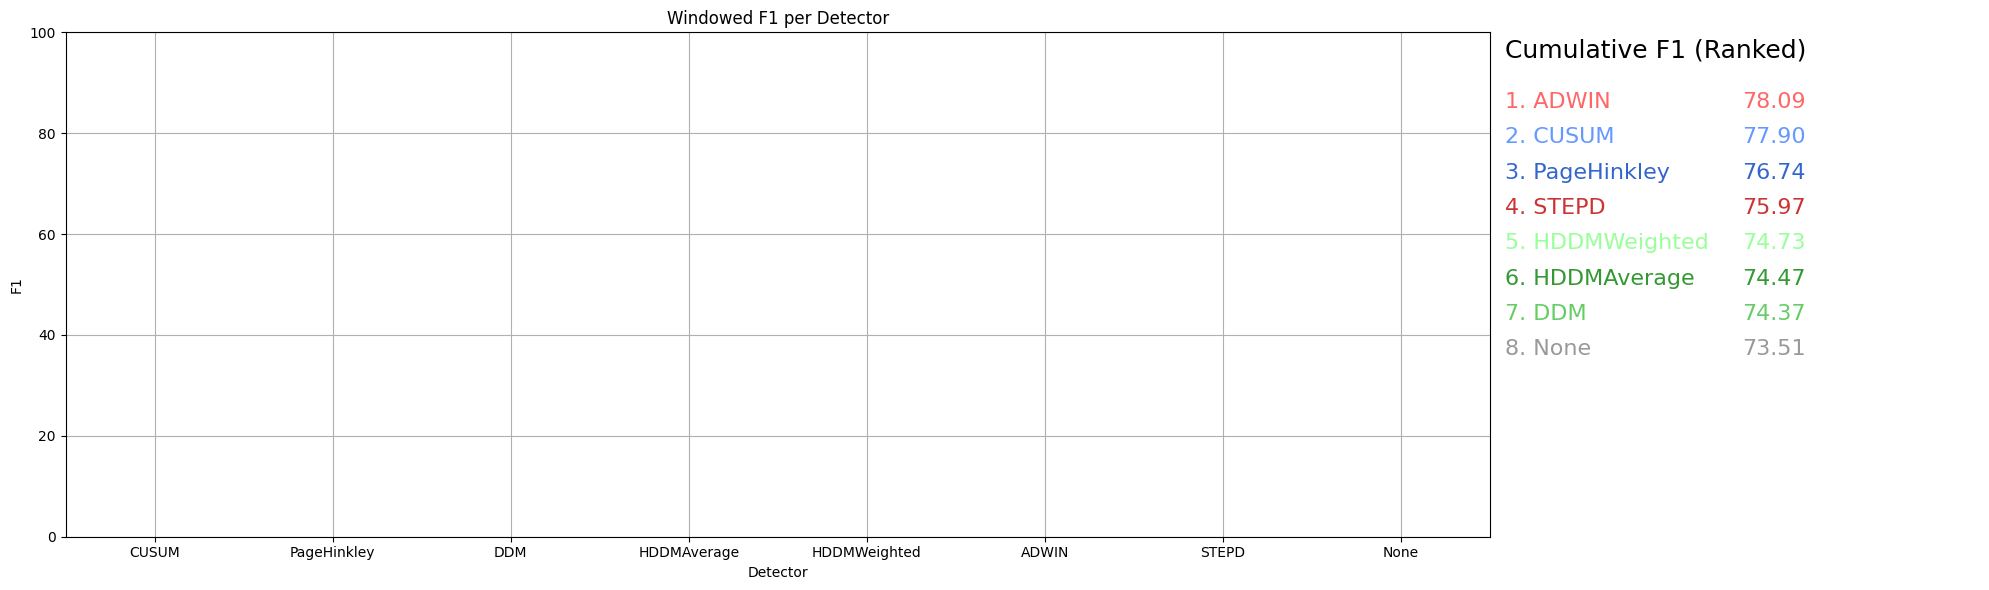

In [22]:
boxplot_detectors(covtype_df, 'f1')

In [23]:
sensor_df = df[df['dataset'] == 'Sensor']

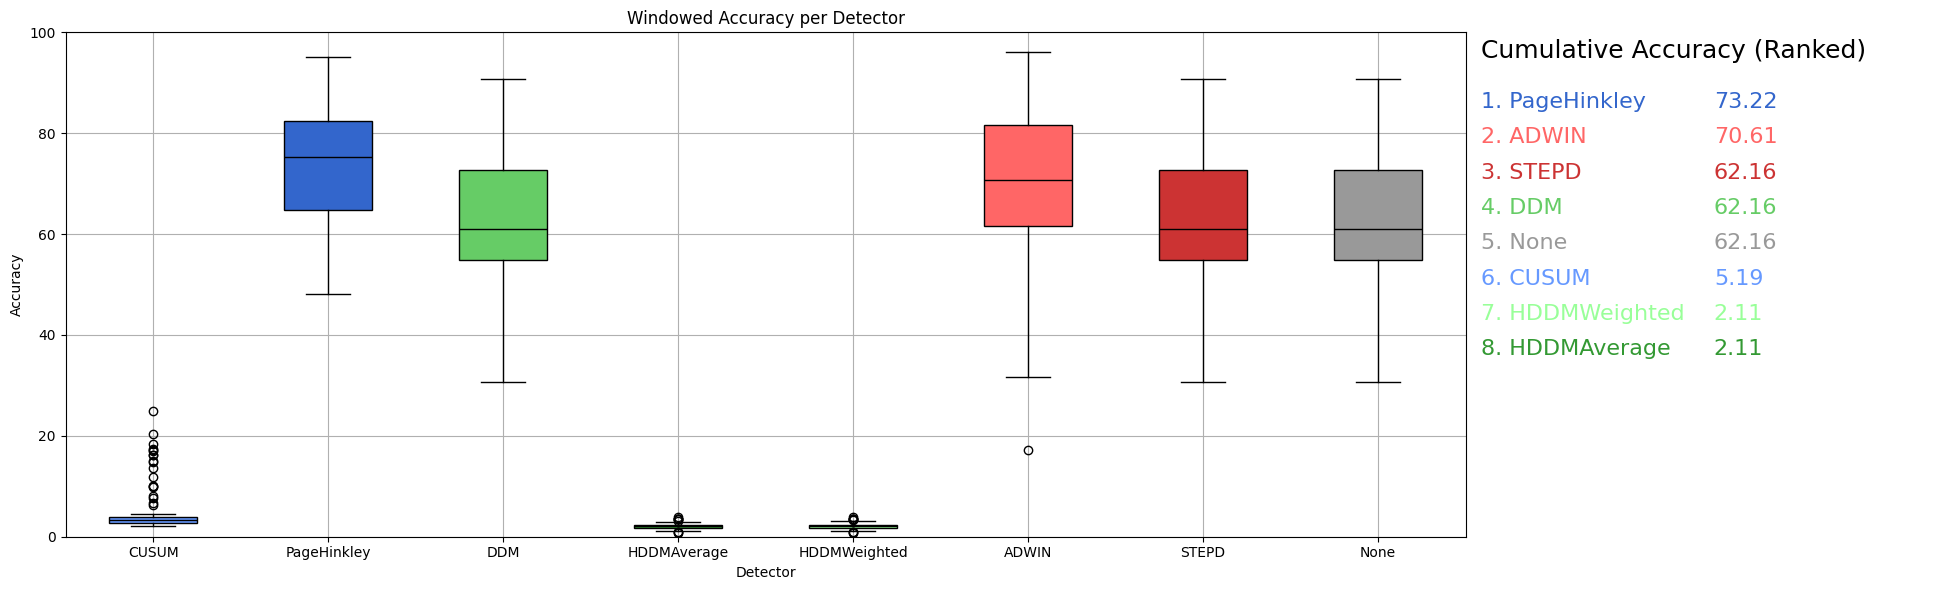

In [24]:
boxplot_detectors(sensor_df, 'accuracy')

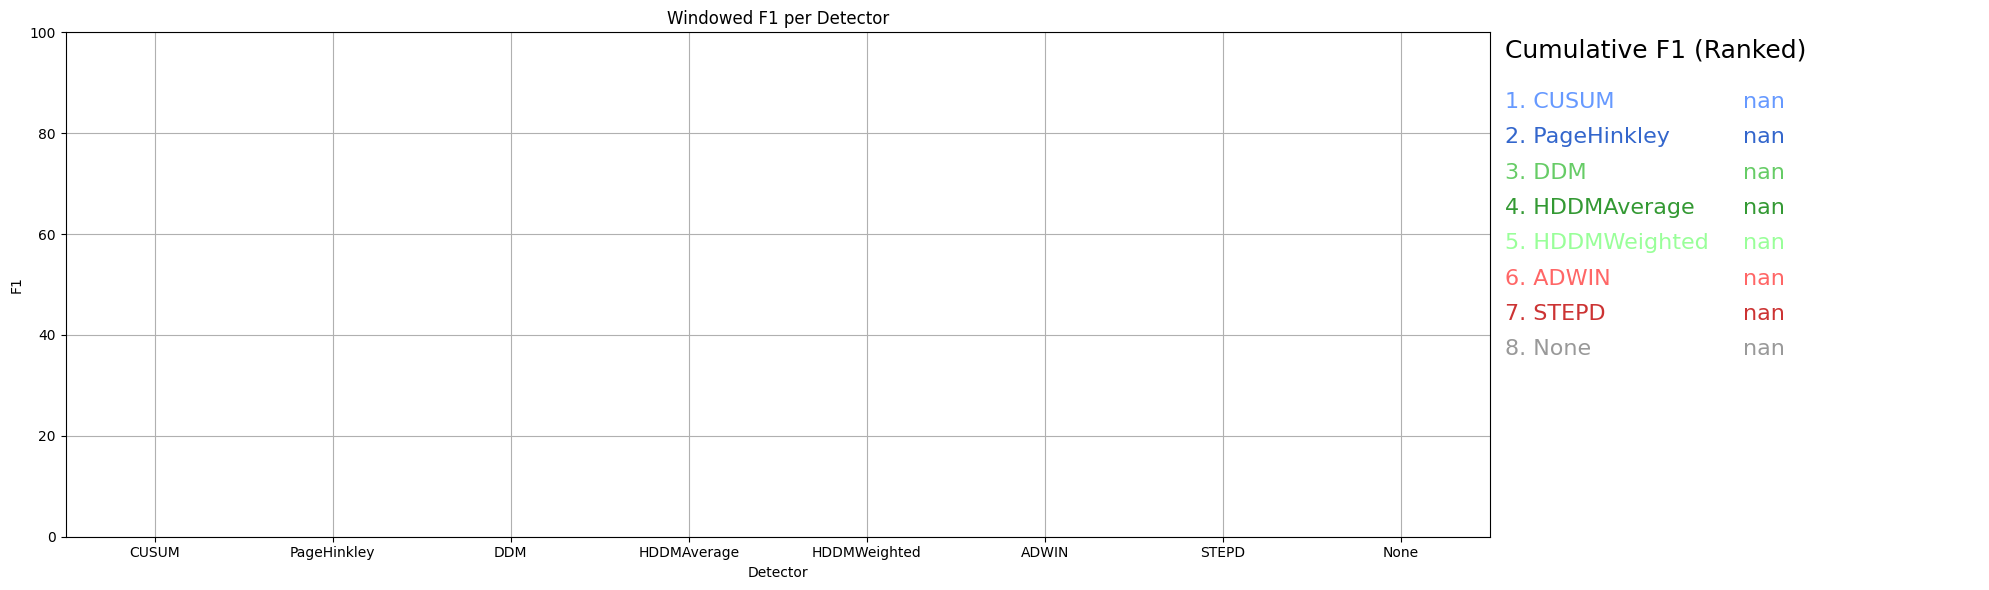

In [25]:
boxplot_detectors(sensor_df, 'f1')